Step 1: Perform Exploratory Data Analysis (EDA)

Dataset keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Shape of data: (1797, 64)
Shape of target: (1797,)


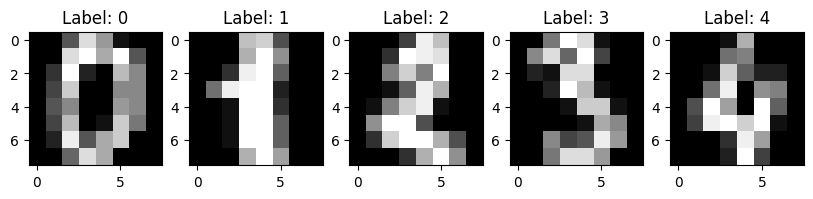

       pixel_0      pixel_1      pixel_2      pixel_3      pixel_4  \
count   1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean       0.0     0.303840     5.204786    11.835838    11.848080   
std        0.0     0.907192     4.754826     4.248842     4.287388   
min        0.0     0.000000     0.000000     0.000000     0.000000   
25%        0.0     0.000000     1.000000    10.000000    10.000000   
50%        0.0     0.000000     4.000000    13.000000    13.000000   
75%        0.0     0.000000     9.000000    15.000000    15.000000   
max        0.0     8.000000    16.000000    16.000000    16.000000   

           pixel_5      pixel_6      pixel_7      pixel_8      pixel_9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.00

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits = load_digits()

# Display basic information
print("Dataset keys:", digits.keys())
print("Shape of data:", digits.data.shape)
print("Shape of target:", digits.target.shape)

# Plot some sample digits
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
plt.show()

# Convert to DataFrame for further analysis
df_digits = pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
df_digits['target'] = digits.target
print(df_digits.describe())

For Regression Dataset (California Housing)

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      

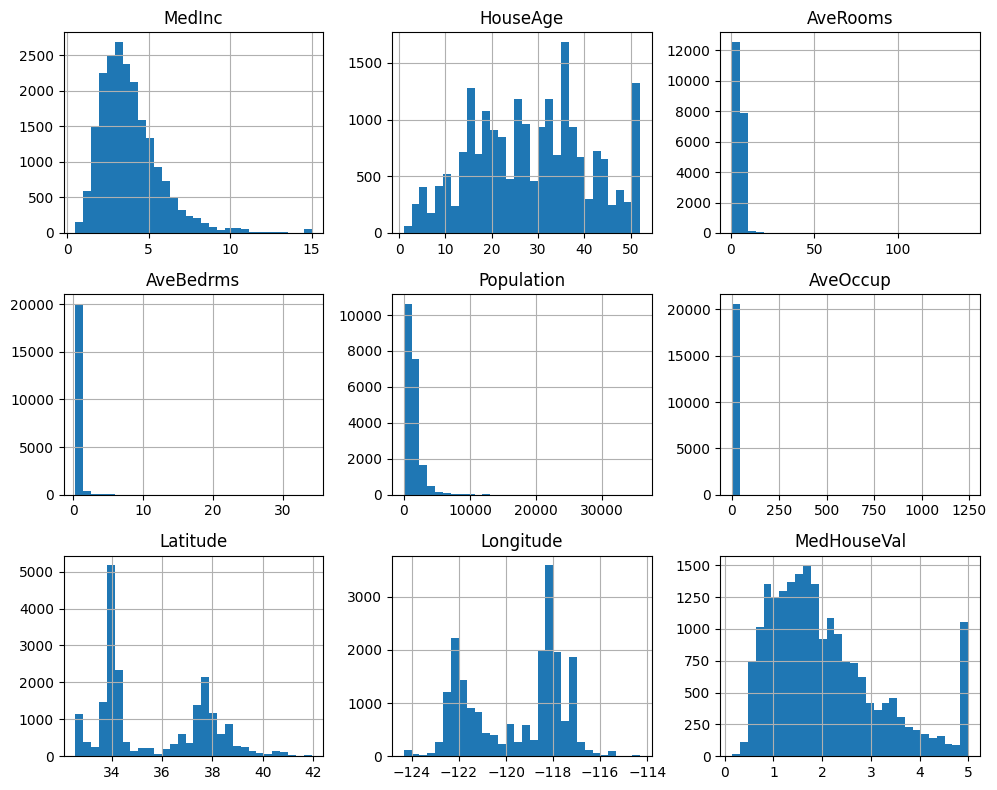

In [ ]:
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)
df_housing = housing.frame

# Display basic information
print("Dataset keys:", housing.keys())
print(df_housing.info())
print(df_housing.describe())

# Plot distributions
df_housing.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

Step 2: Classification Using Default Parameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Confusion matrices
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))

Decision Tree Confusion Matrix:
 [[48  0  0  1  2  1  0  0  0  1]
 [ 1 39  5  1  2  0  0  0  1  1]
 [ 3  3 35  3  0  0  0  1  1  1]
 [ 0  1  0 46  2  0  0  1  1  3]
 [ 0  3  1  1 51  0  2  1  0  1]
 [ 0  0  0  1  1 57  2  1  0  4]
 [ 0  0  0  1  2  0 50  0  0  0]
 [ 0  1  0  4  2  0  0 46  1  1]
 [ 0  6  0  1  0  0  0  1 33  2]
 [ 0  0  1  0  1  4  0  3  0 50]]
Random Forest Confusion Matrix:
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


Step 3: Tune Classifiers

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Tree
dtc_params = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 10, 20]}
grid_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42), dtc_params, cv=5)
grid_dtc.fit(X_train, y_train)
print("Best params for Decision Tree:", grid_dtc.best_params_)

# Hyperparameter tuning for Random Forest
rfc_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_rfc = GridSearchCV(RandomForestClassifier(random_state=42), rfc_params, cv=5)
grid_rfc.fit(X_train, y_train)
print("Best params for Random Forest:", grid_rfc.best_params_)

Best params for Decision Tree: {'max_depth': 15, 'min_samples_split': 2}
Best params for Random Forest: {'max_depth': 20, 'n_estimators': 50}


Step 4: Regression Using Default Parameters

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X = df_housing.drop(columns=['MedHouseVal'])
y = df_housing['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

# Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# Evaluate
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dtr))
print("Decision Tree R^2:", r2_score(y_test, y_pred_dtr))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rfr))
print("Random Forest R^2:", r2_score(y_test, y_pred_rfr))

Decision Tree MSE: 0.5280096503174904
Decision Tree R^2: 0.5977192261218356
Random Forest MSE: 0.25650512920799395
Random Forest R^2: 0.8045734925119942


Step 5: Tune Regressors

In [10]:
# Hyperparameter tuning for Decision Tree Regressor
dtr_params = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 10, 20]}
grid_dtr = GridSearchCV(DecisionTreeRegressor(random_state=42), dtr_params, cv=5)
grid_dtr.fit(X_train, y_train)
print("Best params for Decision Tree Regressor:", grid_dtr.best_params_)

# Hyperparameter tuning for Random Forest Regressor
rfr_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_rfr = GridSearchCV(RandomForestRegressor(random_state=42), rfr_params, cv=5)
grid_rfr.fit(X_train, y_train)
print("Best params for Random Forest Regressor:", grid_rfr.best_params_)

Best params for Decision Tree Regressor: {'max_depth': 10, 'min_samples_split': 20}
Best params for Random Forest Regressor: {'max_depth': None, 'n_estimators': 200}


Step 6: Feature Importances

In [11]:
# Feature importances for Classification
print("Decision Tree Feature Importance:\n", dtc.feature_importances_)
print("Random Forest Feature Importance:\n", rfc.feature_importances_)

# Feature importances for Regression
print("Decision Tree Regressor Feature Importance:\n", dtr.feature_importances_)
print("Random Forest Regressor Feature Importance:\n", rfr.feature_importances_)

Decision Tree Feature Importance:
 [0.         0.00088409 0.         0.00442518 0.00392297 0.04442062
 0.00282909 0.         0.         0.01023916 0.04746276 0.00584973
 0.01113485 0.01914496 0.         0.00088409 0.         0.00173821
 0.01548502 0.01139991 0.04321974 0.10314768 0.00132614 0.
 0.00174853 0.00516951 0.06354341 0.05180011 0.01745622 0.00599919
 0.00604129 0.         0.         0.06194341 0.00783316 0.00565818
 0.07572932 0.01761385 0.01100154 0.         0.         0.
 0.12934119 0.04620457 0.00169454 0.00206288 0.00741758 0.
 0.         0.         0.00820849 0.00294697 0.00417343 0.00445203
 0.02147638 0.00174522 0.         0.         0.00780341 0.
 0.06333397 0.03108634 0.00117879 0.0078223 ]
Random Forest Feature Importance:
 [0.00000000e+00 2.60844489e-03 2.03578272e-02 1.09319099e-02
 7.81896343e-03 1.78922663e-02 8.56505329e-03 9.61248792e-04
 2.35907829e-05 1.45059038e-02 2.79118540e-02 6.35404951e-03
 1.50064282e-02 2.76021413e-02 5.78698930e-03 8.19414188e-04
 2